In [ ]:

#Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.layers import Conv2D,Input, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten,Dense,Dropout,GlobalAveragePooling2D
from keras.models import Sequential  
from keras.models import Model,load_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


import time
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Reading The Data
data = pd.read_csv("/content/drive/My Drive/Data/fer2013.csv")

In [ ]:
data.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [ ]:
# #Data Preprocessing

# #Stacking
# data["pixel"]=data["pixels"]+" "+data["pixels"]+" "+data["pixels"]
# del data["pixels"]


width, height = 48, 48

datapoints = data['pixels'].tolist()

#getting features for training
X = []
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')]
    xx = np.asarray(xx).reshape(width, height,1)
    X.append(xx.astype('float32'))

X = np.asarray(X)

#getting labels for training
y = pd.get_dummies(data['emotion']).values

In [ ]:
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

X shape : (35887, 48, 48, 1)
y shape : (35887, 7)


In [ ]:
#Spliting the Dataset 
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3,random_state=2)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5,random_state=2)

In [ ]:
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_val shape : {X_val.shape}")
print(f"y_val shape : {y_val.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (25120, 48, 48, 1)
y_train shape : (25120, 7)
X_val shape : (5384, 48, 48, 1)
y_val shape : (5384, 7)
X_test shape : (5383, 48, 48, 1)
y_test shape : (5383, 7)


In [ ]:
# from keras.applications.vgg16 import VGG16
# #Transfer Learning
# conv_base = VGG16(include_top=False,
#                       weights='imagenet',
#                       input_shape=(48,48, 3))
# for layer in conv_base.layers[:-2]:
#  layer.trainable = False
 
# model = Sequential()
# model.add(conv_base)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# # model.add(Dense(64, activation='relu'))
# # model.add(BatchNormalization())
# model.add(Dense(32, activation='relu'))
# # model.add(Dense(16, activation='relu'))
# model.add(Dense(7, activation='softmax'))
# # import keras
# # EPOCHS = 50
# # BS = 128
# # DROPOUT_RATE = 0.5
# # FROZEN_LAYER_NUM = 19

# # ADAM_LEARNING_RATE = 0.001
# # SGD_LEARNING_RATE = 0.01
# # SGD_DECAY = 0.0001


# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# vgg_notop = VGGFace(model='vgg16', include_top=False, input_shape=(48,48, 3), pooling='avg')
# #print(vgg_notop.summary())
# last_layer = vgg_notop.get_layer('pool5').output
# x = Flatten(name='flatten')(last_layer)
# x = Dropout(DROPOUT_RATE)(x)
# x = Dense(4096, activation='relu', name='fc6')(x)
# x = Dropout(DROPOUT_RATE)(x)
# x = Dense(1024, activation='relu', name='fc7')(x)

# for i in range(19):
#     vgg_notop.layers[i].trainable = False

# print(vgg_notop.get_layer('pool5').trainable)

# out = Dense(7, activation='softmax', name='classifier')(x)

# model = Model(vgg_notop.input, out)


# # optim = keras.optimizers.Adam(lr=ADAM_LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# # #optim = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# # sgd = keras.optimizers.SGD(lr=SGD_LEARNING_RATE, momentum=0.9, decay=SGD_DECAY, nesterov=True)
# # rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',mode='max',factor=0.5, patience=10, min_lr=0.00001, verbose=1)


# from keras.layers import Conv2D,Input, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten,Dense,Dropout,GlobalAveragePooling2D,Convolution2D,MaxPooling2D


# model = Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))


# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
np.random.seed(10)
model = Sequential()

# 1. Conv
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# 2. Conv Layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3. Conv Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4. Conv Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_24 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 128)      

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

In [ ]:
#CallBacks

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.001)



# checkpoint_filepath = '/content/drive/My Drive/Data/checkpoints/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5'

# checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
#                              monitor="val_accuracy",
#                              verbose=1,
#                              save_best_only=True,
#                              mode='auto',
#                              save_freq="epoch"
# #                              )
# checkpoint=[reduce_lr]
#,callbacks=[checkpoint]
# from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)
# datagen.fit(X_train)

In [ ]:
history=model.fit(x=X_train, y=y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
197/197 [==============================] - 11s 52ms/step - loss: 1.9459 - accuracy: 0.2585 - val_loss: 1.8673 - val_accuracy: 0.2964
Epoch 2/10
197/197 [==============================] - 10s 51ms/step - loss: 1.5216 - accuracy: 0.4171 - val_loss: 1.4826 - val_accuracy: 0.4307
Epoch 3/10
197/197 [==============================] - 10s 52ms/step - loss: 1.3300 - accuracy: 0.4886 - val_loss: 1.3800 - val_accuracy: 0.4785
Epoch 4/10
197/197 [==============================] - 10s 51ms/step - loss: 1.2146 - accuracy: 0.5375 - val_loss: 1.4663 - val_accuracy: 0.3936
Epoch 5/10
197/197 [==============================] - 10s 51ms/step - loss: 1.1355 - accuracy: 0.5690 - val_loss: 1.2696 - val_accuracy: 0.5249
Epoch 6/10
197/197 [==============================] - 10s 50ms/step - loss: 1.0876 - accuracy: 0.5928 - val_loss: 1.2601 - val_accuracy: 0.5199
Epoch 7/10
197/197 [==============================] - 10s 50ms/step - loss: 1.0337 - accuracy: 0.6097 - val_loss: 1.1986 - val_accuracy:

In [ ]:
 def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

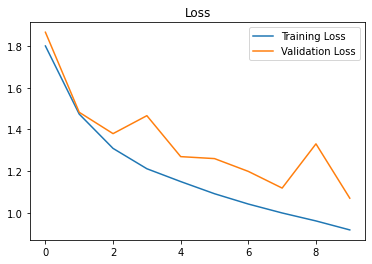

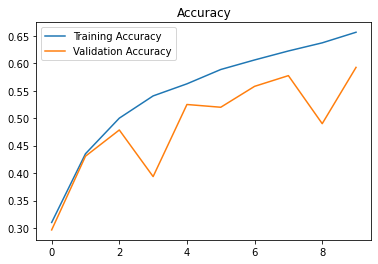

In [ ]:
history = model.history.history
plot_metrics(history)

In [ ]:
#ISSUES:: Overfitting :use dropout and increase validation dataset and shuffle before train_test_split 

# bestVGG16_model = load_model(filepath='/content/gdrive/My Drive/VGGmodels/075-0.99')

In [ ]:
# loss, acc = bestVGG16_model.evaluate(x=X_test, y=Y_test)

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.001)

In [ ]:
# from keras.applications import ResNet50
# INCV3=ResNet50(include_top=False, weights='imagenet',  input_shape=(48,48,3),pooling=max)
# incv3=Sequential()
# incv3.add(INCV3)
# incv3.add(Dropout(0.3))
# incv3.add(Flatten())
# incv3.add(Dropout(0.5))
# incv3.add(Dense(7, activation='relu'))
# incv3.layers[0].trainable = False
# incv3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# incv3.fit(X_train, y_train, batch_size=128,validation_data=(X_val, y_val), epochs = 40, verbose = 1,shuffle=True)

Epoch 1/40
197/197 [==============================] - 17s 84ms/step - loss: 3.3650 - accuracy: 0.3130 - val_loss: 3.3415 - val_accuracy: 0.2933
Epoch 2/40
197/197 [==============================] - 17s 84ms/step - loss: 3.3627 - accuracy: 0.3136 - val_loss: 3.3316 - val_accuracy: 0.2949
Epoch 3/40
197/197 [==============================] - 17s 84ms/step - loss: 3.3672 - accuracy: 0.3109 - val_loss: 3.3479 - val_accuracy: 0.3013
Epoch 4/40
197/197 [==============================] - 17s 84ms/step - loss: 3.3645 - accuracy: 0.3170 - val_loss: 3.3326 - val_accuracy: 0.2962
Epoch 5/40
197/197 [==============================] - 17s 84ms/step - loss: 3.3587 - accuracy: 0.3162 - val_loss: 3.3447 - val_accuracy: 0.3022
Epoch 6/40
197/197 [==============================] - 17s 84ms/step - loss: 3.3568 - accuracy: 0.3194 - val_loss: 3.3430 - val_accuracy: 0.2966
Epoch 7/40
197/197 [==============================] - 17s 84ms/step - loss: 3.3618 - accuracy: 0.3139 - val_loss: 3.3327 - val_accuracy: